In [53]:
from glob import glob
from os import path
from pandas import read_csv, concat
from csv import writer

In [54]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [55]:
#load data
folder_path = './csv/Angular_swing30/'

#파일 형식: s1_gyr.csv
swing_files = glob(path.join(folder_path, 's*_gyr.csv'))

df_swing = concat((read_csv(f,header=0) for f in swing_files),ignore_index=True)
df_swing.fillna(0, inplace=True)

#load data
folder_path = './csv/Angular_perting30/'

#파일 형식: s1_gyr.csv
perting_files2 = glob(path.join(folder_path, 'p*_gyr.csv'))

df_perting = concat((read_csv(f,header=0) for f in perting_files2),ignore_index=True)
df_perting.fillna(0, inplace=True)

df_swing.fillna(0, inplace=True)
df_perting.fillna(0, inplace=True)


In [4]:
type(df_swing)

pandas.core.frame.DataFrame

In [5]:
print(df_swing.head())
print(df_perting.head())

       time     X_value       Y_value   Z_value
0  Started:  8월 21 2019  10:32:44:533          
1    0.0000     0.00000       0.00000   0.00000
2    0.0005    -0.61352       0.40110  -0.80188
3    0.0327    -0.47874       0.34446  -0.62287
4    0.0663    -0.36801       0.30112  -0.48450
       time     X_value       Y_value  Z_value
0  Started:  8월 21 2019  11:12:12:974         
1    0.0000     0.00000       0.00000  0.00000
2    0.0005    -0.08245       0.10290  0.03318
3    0.0318    -0.08241       0.08221  0.01994
4    0.0659    -0.07358       0.06220  0.01002


In [6]:
df_swing.info, df_perting.info

(<bound method DataFrame.info of           time     X_value       Y_value   Z_value
 0     Started:  8월 21 2019  10:32:44:533          
 1       0.0000     0.00000       0.00000   0.00000
 2       0.0005    -0.61352       0.40110  -0.80188
 3       0.0327    -0.47874       0.34446  -0.62287
 4       0.0663    -0.36801       0.30112  -0.48450
 ...        ...         ...           ...       ...
 4480    4.6946    -0.96305       0.73816  -1.09204
 4481    4.7281    -0.94495       0.66042  -1.00185
 4482    4.7625    -0.95809       0.65445  -0.93182
 4483    4.7959    -0.84050       0.55734  -0.87479
 4484    4.8304    -0.65052       0.42143  -0.82495
 
 [4485 rows x 4 columns]>,
 <bound method DataFrame.info of           time     X_value       Y_value   Z_value
 0     Started:  8월 21 2019  11:12:12:974          
 1       0.0000     0.00000       0.00000   0.00000
 2       0.0005    -0.08245       0.10290   0.03318
 3       0.0318    -0.08241       0.08221   0.01994
 4       0.0659    -0.0

In [7]:
def plotgrp(df,title):
    start,end = 1,1
    for i in range(1,len(df)):
      
    
        if df['time'][i] == 'Started:':
            end = i-1
            subset = df[start:end][1:].astype(float)
            plt.plot(subset['time'],subset['X_value'],color='r')
            plt.plot(subset['time'],subset['Y_value'],color = 'g')
            plt.plot(subset['time'],subset['Z_value'],color='b')
            start = i+1 
        
        plt.legend(['X','Y','Z'])
        plt.title(title)

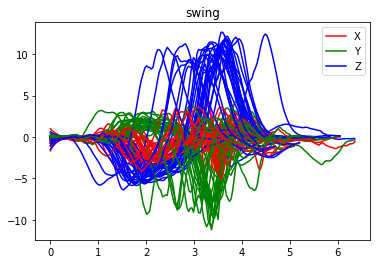

In [8]:
plotgrp(df_swing,"swing")

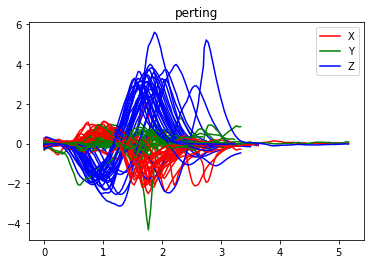

In [9]:
plotgrp(df_perting,"perting")

In [10]:
def resizedataseq(df,seqlen):
    totlen = len(df)
    Qx = list(df.iloc[-1:-6:-1,0])
    Qy = list(df.iloc[-1:-6:-1,1])
    Qz = list(df.iloc[-1:-6:-1,2])
    
    
    while totlen != seqlen:
        mx = np.mean(Qx)
        my = np.mean(Qy)
        mz = np.mean(Qz)

        if totlen <seqlen:
            Qx.pop(0)
            Qy.pop(0)
            Qz.pop(0)
            Qx.append(mx)
            Qy.append(my)
            Qz.append(mz)
            #행추가
            df.loc[totlen]=[mx,my,mz]
            totlen = totlen+1
        
        
        elif totlen > seqlen:
            #행삭제
            df = df.iloc[:seqlen,:]
            totlen = seqlen
            break
            
        
    return df

In [11]:
X = np.empty(shape=(1,140,3))
y = []
#swing은 1 perting은 0
start = 1
end = 0

for i in range(1,len(df_swing)):
    if i==len(df_swing)-1:
        end = i-1
        #subset = df_swing[start:end][1:].astype(float)
        #print(np.mean(subset))
        subset= df_swing.iloc[start:end,1:].astype(float)
        #print(len(subset))
        subset= resizedataseq(subset,140)
        start = i+1
        if len(subset) == 140:
            subset = subset.values
            subset=subset[np.newaxis]
            X =np.concatenate((X,subset))
            print(subset.shape)
            y.append(1)

            
    if df_swing['time'][i] == 'Started:':
        end = i-1
        #subset = df_swing[start:end][1:].astype(float)
        #print(np.mean(subset))
        subset= df_swing.iloc[start:end,1:].astype(float)
        #print(len(subset))
        subset= resizedataseq(subset,140)
        start = i+1
        if len(subset) == 140:
            subset = subset.values
            subset=subset[np.newaxis]
            X =np.concatenate((X,subset))
            print(subset.shape)
            y.append(1)
        
        
print(X.shape)

(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(30, 140, 3)


In [12]:
X=np.delete(X,0,axis=0)

In [13]:
X.shape, len(y)

((29, 140, 3), 29)

In [14]:
#swing은 1 perting은 0
start = 1
end = 0

for i in range(1,len(df_perting)):
    if i==len(df_perting)-1:
        end = i-1
        subset= df_perting.iloc[start:end,1:].astype(float)
        subset= resizedataseq(subset,140)
        start = i+1
        if len(subset) == 140:
            subset = subset.values
            subset=subset[np.newaxis]
            X =np.concatenate((X,subset))
            print(subset.shape)
            y.append(0)

            
    if df_perting['time'][i] == 'Started:':
        end = i-1
        subset= df_perting.iloc[start:end,1:].astype(float)
        subset= resizedataseq(subset,140)
        start = i+1
        if len(subset) == 140:
            subset = subset.values
            subset=subset[np.newaxis]
            X =np.concatenate((X,subset))
            print(subset.shape)
            y.append(0)
        
        
print(X.shape)

(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(1, 140, 3)
(57, 140, 3)


In [15]:
y=np.array(y)
X.shape, len(y)

((57, 140, 3), 57)

In [16]:
from tensorflow.python.lib.io import file_io
import argparse
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM, Conv1D
from keras.callbacks import TensorBoard, ModelCheckpoint
from numpy import array, split

import keras as k
import tensorflow as tf
from keras.models import load_model
from tensorflow.python.saved_model import builder as saved_model_builder
from tensorflow.python.saved_model import tag_constants, signature_constants
from tensorflow.python.saved_model.signature_def_utils_impl import predict_signature_def


W0827 11:26:38.318057 20000 __init__.py:690] 

  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  
Using TensorFlow backend.


### X : (57,140,3) input
### Y: (57) label



In [17]:
# training parameters
epochs = 50
batch_size = 100
validation_split = 0.2

# model parameters
dropout = 0.2
timesteps = 40
timesteps_in_future = 20
nodes_per_layer = 32
filter_length = 3


### 훈력데이터와 테스트데이터 분류

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [19]:
X_train.shape, y_train.shape

((45, 140, 3), (45,))

In [20]:
X_test.shape, y_test.shape

((12, 140, 3), (12,))

### 입력값 정규화

In [21]:
#scaler = MinMaxScaler(feature_range=(0, 1))
#X = scaler.fit_transform(X)  # X*scaler.scale_+scaler.min_ (columnwise)

### 라벨 one_hot 인코딩 

In [22]:
import keras.utils as utils
y_train  = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [23]:
model = Sequential()
#Conv1D(3, 8, strides=1, activation='relu')
#model.add(LSTM(128,input_shape=(140,3)))
model.add(LSTM(128,batch_input_shape=(1,140,3),stateful=True))
model.add(Activation('relu'))

model.add(Dropout(0.2))

#output layer = 출력 데이터 입력!
model.add(Dense(2, activation='sigmoid'))


W0827 11:26:39.773126 20000 module_wrapper.py:137] From C:\Users\Bin\Anaconda3\envs\venv_ml\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0827 11:26:40.363585 20000 deprecation.py:506] From C:\Users\Bin\Anaconda3\envs\venv_ml\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [24]:
#optimizer
sgd = k.optimizers.SGD(lr=0.01, momentum = 0.0, decay = 0.0)

#Cost Function
model.compile(loss = 'binary_crossentropy', optimizer = sgd, metrics=['accuracy'])

#rmspd..

W0827 11:26:40.483270 20000 module_wrapper.py:137] From C:\Users\Bin\Anaconda3\envs\venv_ml\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0827 11:26:40.506215 20000 deprecation.py:323] From C:\Users\Bin\Anaconda3\envs\venv_ml\lib\site-packages\tensorflow_core\python\ops\nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [25]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (1, 128)                  67584     
_________________________________________________________________
activation_1 (Activation)    (1, 128)                  0         
_________________________________________________________________
dropout_1 (Dropout)          (1, 128)                  0         
_________________________________________________________________
dense_1 (Dense)              (1, 2)                    258       
Total params: 67,842
Trainable params: 67,842
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
batch_size = 16
epochs = 20

history = model.fit(X_train, y_train,
                   epochs = epochs, 
                   batch_size=1,
                    verbose=1,
                   validation_data=(X_test,y_test),
                   shuffle=True)

Train on 45 samples, validate on 12 samples
Epoch 1/20
45/45 [==============================] - 5s 121ms/step - loss: 0.6972 - acc: 0.3778 - val_loss: 0.6962 - val_acc: 0.2500
Epoch 2/20
45/45 [==============================] - 4s 84ms/step - loss: 0.6857 - acc: 0.5000 - val_loss: 0.6955 - val_acc: 0.2917
Epoch 3/20
45/45 [==============================] - 4s 82ms/step - loss: 0.6749 - acc: 0.5556 - val_loss: 0.6944 - val_acc: 0.2917
Epoch 4/20
45/45 [==============================] - 4s 84ms/step - loss: 0.6620 - acc: 0.5556 - val_loss: 0.6933 - val_acc: 0.2917
Epoch 5/20
45/45 [==============================] - 4s 87ms/step - loss: 0.6596 - acc: 0.5556 - val_loss: 0.6919 - val_acc: 0.2917
Epoch 6/20
45/45 [==============================] - 4s 86ms/step - loss: 0.6496 - acc: 0.5556 - val_loss: 0.6895 - val_acc: 0.2917
Epoch 7/20
45/45 [==============================] - 4s 93ms/step - loss: 0.6422 - acc: 0.6000 - val_loss: 0.6881 - val_acc: 0.2917
Epoch 8/20
45/45 [====================

In [27]:
score = model.evaluate(X_test, y_test, batch_size=1)
print("Accuracy : %.2f%%"%(score[1]*100))
score

12/12 [==============================] - 0s 19ms/step
Accuracy : 100.00%


[0.34236832583944005, 1.0]

In [28]:
#모델 평가하기
#score = model.evaluate(X_test, y_test, verbose=0)
#print("Accuracy : %.2f%%"%(score[1]*100))

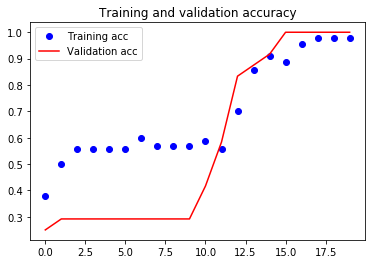

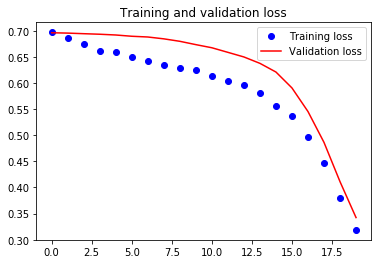

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
# callback 함수 accuray저장.. overfitting 발생후로부터의 결과 저장 X

In [30]:
for index in np.random.choice(len(y_test), 10, replace = False):
    predicted = model.predict(X_test[index:index + 1])[0]
    label = y_test[index]
    result_label = np.where(label == np.amax(label))
    result_predicted = np.where(predicted == np.amax(predicted))
    
    print("Label value = %d  Predicted value = %d " % (result_label[0],  result_predicted[0]))
    #title = "Label value = %d  Predicted value = %d " % (result_label[0],  result_predicted[0])
    #fig = plt.figure(1, figsize = (3,3))
    #ax1 = fig.add_axes((0,0,.8,.8))
    #ax1.set_title(title)
    #images = X_test
    #plt.imshow(images[index], cmap = plt.cm.gray_r, interpolation = 'nearest')
    #plt.show()

Label value = 1  Predicted value = 1 
Label value = 0  Predicted value = 0 
Label value = 0  Predicted value = 0 
Label value = 0  Predicted value = 0 
Label value = 1  Predicted value = 1 
Label value = 0  Predicted value = 0 
Label value = 0  Predicted value = 0 
Label value = 0  Predicted value = 0 
Label value = 1  Predicted value = 1 
Label value = 0  Predicted value = 0 


###  모델저장

In [31]:
# save model
#model_h5_name = 'model_acc_' + str(acc) + '.h5'
model_h5_name = 'model1'+'.h5'
model.save(model_h5_name)

In [32]:
model.predict(X_test[2:3])[0]

array([0.69489294, 0.31912592], dtype=float32)

In [33]:
X_test[2].shape

(140, 3)

In [34]:
X_test[1:2].shape

(1, 140, 3)

In [35]:
temp = read_csv('./csv/golfvsbat/golf1.csv',header=0)

In [36]:
temp.head()

,time,X_value,Y_value,Z_value
0,Started:,8월 19 2019,15:06:36:902,
1,0.0000,0.00000,0.00000,0.00000
2,0.0030,-0.17909,-0.15016,-0.11115
3,0.0446,0.17801,-0.11336,0.67382
4,0.0854,-0.31890,-0.06111,0.24877


In [37]:
t= temp.iloc[1:,1:].astype(float)
t = resizedataseq(t,140)

###  resize data: index로 접근하여 데이터 추가하다 보니 데이터 처음은 0 index를 무시하고 1부터 시작하여 length에 값이 덮어써지고 지역변수인 totlen만 증가함.

In [38]:
temp_test = read_csv("./csv/test.csv",header=0)
temp_test.fillna(0, inplace=True)

In [39]:
temp_test.head()

,Time,AccX,AccY,AccZ,Unnamed: 4
0,Started:,0.000000,0.000000,0.000000,0.0
1,1.6777216E7,-0.058831,-0.370334,0.096460,0.0
2,1.6777216E7,-0.078379,-0.209676,0.197253,0.0
3,1.6777216E7,-0.085098,-0.085671,0.194809,0.0
4,1.6777216E7,-0.114420,-0.083227,0.137388,0.0


In [40]:
temp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
Time          129 non-null object
AccX          129 non-null float64
AccY          129 non-null float64
AccZ          129 non-null float64
Unnamed: 4    129 non-null float64
dtypes: float64(4), object(1)
memory usage: 5.2+ KB


In [41]:
def plotgrp2(df,title):
    start,end = 1,len(df)-1
    for i in range(1,len(df)):
        subset = df[start:end][1:].astype(float)
        plt.plot([x for x in range(start,end-2)],subset.iloc[start:end,1],color='r')
        plt.plot([x for x in range(start,end-2)],subset.iloc[start:end,2],color='g')
        plt.plot([x for x in range(start,end-2)],subset.iloc[start:end,3],color='b')
    plt.legend(['X','Y','Z'])
    plt.title(title)
      
    
    """
        if df.iloc[i,0] == 'Started:':
            end = i-1
            subset = df[start:end][1:].astype(float)
            plt.plot([x for x in len(df)],subset[start:end][1],color='r')
            plt.plot([x for x in len(df)],subset[start:end][2],color = 'g')
            plt.plot([x for x in len(df)],subset[start:end][3],color='b')
            start = i+1 
            """
       
        

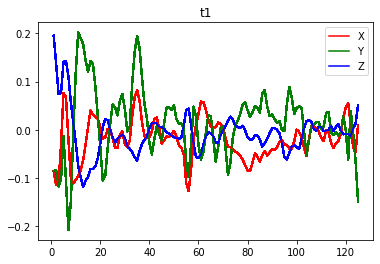

In [42]:
plotgrp2(temp_test,"t1")

In [43]:
temp_test = temp_test.iloc[:,1:-1]

In [44]:
temp_test.head()

,AccX,AccY,AccZ
0,0.000000,0.000000,0.000000
1,-0.058831,-0.370334,0.096460
2,-0.078379,-0.209676,0.197253
3,-0.085098,-0.085671,0.194809
4,-0.114420,-0.083227,0.137388


In [45]:
temp_test= resizedataseq(temp_test,140)

In [46]:
temp_test.shape

(140, 3)

In [47]:
temp_test= temp_test.values
temp_test=temp_test[np.newaxis]
#swing 1 perting 0
temp_test.shape

(1, 140, 3)

In [48]:
predicted=model.predict(temp_test[0:1])[0]
label = 0
result_predicted = np.where(predicted == np.amax(predicted))
predicted

array([0.68421376, 0.31820673], dtype=float32)

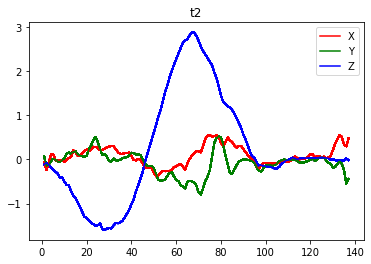

In [49]:
temp_test1 = read_csv("./csv/test-1.csv",header=0)
temp_test1.fillna(0, inplace=True)
plotgrp2(temp_test1,"t2")
temp_test1 = temp_test1.iloc[:,1:-1]
temp_test1= resizedataseq(temp_test1,140)
temp_test1= temp_test1.values
temp_test1=temp_test1[np.newaxis]

In [50]:
predicted=model.predict(temp_test1[0:1])[0]
label = 0
result_predicted = np.where(predicted == np.amax(predicted))
predicted

array([0.65111405, 0.36058378], dtype=float32)

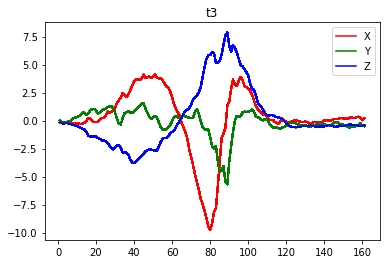

In [51]:
temp_test2 = read_csv("./csv/test-2.csv",header=0)
temp_test2.fillna(0, inplace=True)
plotgrp2(temp_test2,"t3")
temp_test2 = temp_test2.iloc[:,1:-1]
temp_test2= resizedataseq(temp_test2,140)
temp_test2= temp_test2.values
temp_test2=temp_test2[np.newaxis]

In [52]:
predicted=model.predict(temp_test2[0:1])[0]
label = 0
result_predicted = np.where(predicted == np.amax(predicted))
predicted

array([0.234814  , 0.77357763], dtype=float32)